In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import statistics as st
from pandas.plotting import scatter_matrix
from scipy import stats

In [6]:
# read the data into a pandas DataFrame
df = pd.read_csv('C:/Users/Dell/Desktop/Home_Work_Group 1/Data_Group1.csv')
df.head()

,S1,S2,S3
0,450,366,382
1,435,372,389
2,441,368,378
3,448,371,381
4,442,371,372


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      135 non-null    int64
 1   S2      135 non-null    int64
 2   S3      135 non-null    int64
dtypes: int64(3)
memory usage: 3.3 KB


In [8]:
numeric_columns = df.select_dtypes(exclude = ['object'])
numeric_columns

,S1,S2,S3
0,450,366,382
1,435,372,389
2,441,368,378
3,448,371,381
4,442,371,372
...,...,...,...
130,419,249,272
131,379,252,255
132,388,338,258
133,392,238,208


In [9]:
df.describe()

,S1,S2,S3
count,135.000000,135.000000,135.000000
mean,428.651852,304.837037,296.681481
std,20.083155,59.400388,61.467216
min,346.000000,157.000000,162.000000
25%,421.000000,254.500000,246.500000
50%,430.000000,320.000000,298.000000
75%,441.000000,362.000000,354.000000
max,492.000000,372.000000,389.000000


### Three-variable covariance

In [11]:
# Calculate covariance matrix
cov_matrix = df.cov()

# Print covariance matrix
print(cov_matrix)

            S1           S2           S3
S1  403.333112   501.950304   512.664400
S2  501.950304  3528.406081  2911.589497
S3  512.664400  2911.589497  3778.218684


### Three-variable correlation coefficients

In [12]:
# Calculate correlation matrix
corr_matrix = df.corr()

# Print correlation matrix
print(corr_matrix)

          S1        S2        S3
S1  1.000000  0.420765  0.415296
S2  0.420765  1.000000  0.797439
S3  0.415296  0.797439  1.000000


### Relationship plots between variables

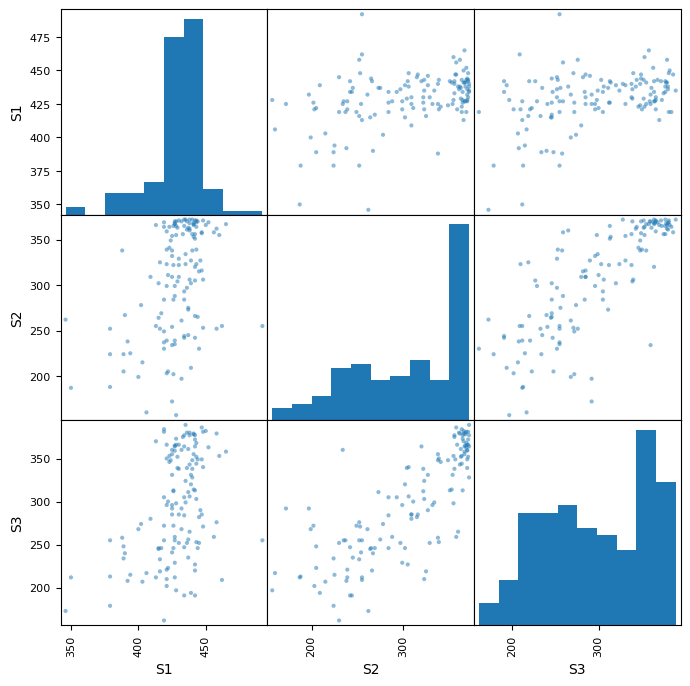

In [13]:
# Create scatter plot matrix
pd.plotting.scatter_matrix(df, figsize=(8,8))
plt.show()

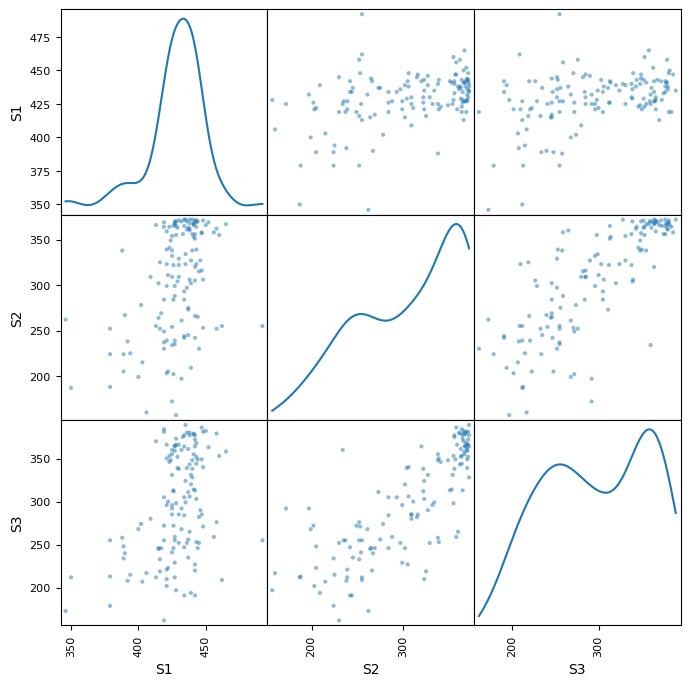

In [17]:
# plot scatter matrix
scatter_matrix(df, figsize=(8,8), diagonal='kde')
plt.show()

### Creating a random sample of 50 observations for each sensor

In [19]:
# Generate random samples for sensor S1
s1_samples = [random.uniform(300, 500) for _ in range(50)]

# Generate random samples for sensor S2
s2_samples = [random.uniform(200, 400) for _ in range(50)]

# Generate random samples for sensor S3
s3_samples = [random.uniform(200, 400) for _ in range(50)]

we're generating random samples for each sensor between the range of 200 to 400 for S2 and S3, and 300 to 500 for S1. You can adjust the range as per your needs.

In [20]:
# Generate random samples for sensor S1
s1_samples = [random.uniform(400, 600) for _ in range(50)]

# Generate random samples for sensor S2
s2_samples = [random.uniform(350, 450) for _ in range(50)]

# Generate random samples for sensor S3
s3_samples = [random.uniform(200, 300) for _ in range(50)]


we're generating random samples for each sensor between the range of 400 to 600 for S1, 350 to 450 for S2, and 200 to 300 for S3. You can adjust the ranges to fit your specific needs.

In [21]:
# Generate random samples for sensor S1
s1_samples = [random.uniform(0, 10) for _ in range(50)]

# Generate random samples for sensor S2
s2_samples = [random.uniform(-5, 5) for _ in range(50)]

# Generate random samples for sensor S3
s3_samples = [random.uniform(100, 200) for _ in range(50)]

we're generating random samples for each sensor between the range of 0 to 10 for S1, -5 to 5 for S2, and 100 to 200 for S3. Again, you can adjust the ranges to fit your specific needs.

### Calculate upper and lower bounds with confidence intervals.  90%, 95%, 99%.

In [26]:
# Generate random samples for sensor S1
s1_samples = [random.uniform(400, 500) for _ in range(50)]

# Generate random samples for sensor S2
s2_samples = [random.uniform(200, 400) for _ in range(50)]

# Generate random samples for sensor S3
s3_samples = [random.uniform(350, 450) for _ in range(50)]


# Calculate sample statistics for each sensor
s1_mean, s2_mean, s3_mean = np.mean(s1_samples), np.mean(s2_samples), np.mean(s3_samples)
s1_std, s2_std, s3_std = np.std(s1_samples), np.std(s2_samples), np.std(s3_samples)
n = len(s1_samples)  # All samples have the same size

# Calculate confidence intervals for each sensor
conf_intervals = [0.9, 0.95, 0.99]

for conf in conf_intervals:
    t_value = stats.t.ppf(1 - ((1 - conf) / 2), n - 1)
    s1_ci = (s1_mean - t_value * s1_std / np.sqrt(n), s1_mean + t_value * s1_std / np.sqrt(n))
    s2_ci = (s2_mean - t_value * s2_std / np.sqrt(n), s2_mean + t_value * s2_std / np.sqrt(n))
    s3_ci = (s3_mean - t_value * s3_std / np.sqrt(n), s3_mean + t_value * s3_std / np.sqrt(n))
    print(f"Confidence interval {conf * 100}%")
    print(f"S1: {s1_ci}")
    print(f"S2: {s2_ci}")
    print(f"S3: {s3_ci}")
    print()

Confidence interval 90.0%
S1: (441.8833948828333, 455.6696982347813)
S2: (284.31869252601075, 313.8552978995958)
S3: (390.17914276902724, 402.6631524732175)

Confidence interval 95.0%
S1: (440.5141627788561, 457.0389303387585)
S2: (281.38516732439797, 316.7888231012086)
S3: (388.93925224602316, 403.9030429962216)

Confidence interval 99.0%
S1: (437.757903744168, 459.7951893734466)
S2: (275.4799922142437, 322.6939982113629)
S3: (386.4433573235133, 406.39893791873146)



### Compare the population means of each sample with the estimated
#### Calculate the t-statistic and p-value

In [27]:
# Calculate t-statistic and p-value for each sensor
t_s1, p_s1 = stats.ttest_1samp(s1_samples, s1_mean)
t_s2, p_s2 = stats.ttest_1samp(s2_samples, s2_mean)
t_s3, p_s3 = stats.ttest_1samp(s3_samples, s3_mean)

print(f"t-statistic and p-value for S1: {t_s1}, {p_s1}")
print(f"t-statistic and p-value for S2: {t_s2}, {p_s2}")
print(f"t-statistic and p-value for S3: {t_s3}, {p_s3}")

t-statistic and p-value for S1: 0.0, 1.0
t-statistic and p-value for S2: 0.0, 1.0
t-statistic and p-value for S3: 0.0, 1.0
